
**The Problem**

A shopping Mall experiencing some decline and stagnation in some areas of product sales and profit is seeking ways to revamp the product sales and increase profit.To make this happen,the company is seeking to use AI and Machine learning to segment its customers base to enable them to be more efficient in terms of time, money and other resources.

Customer egmentation allows companies to learn about their customers. They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products.

**K-Means Clustering -ML tool Used**

K-Means clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters. Here, the “K” is the given number of predefined clusters, that need to be created.


**Data Dictionary**

CustomerID: It is the unique ID given to a customer

Gender: Gender of the customer

Age: The age of the customer

Annual Income(k$): It is the annual income of the customer

Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.


**Loading libraries and overview of datasets**


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



**Loading datasets**

In [7]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)

#checking the dataset
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74



**Let's find out some more information about the dataset i.e. total number of observations in the dataset, columns and their data types, etc.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Oberservation: Dataset has 200 entries  with no null value



**Exploratory Data Analysis**

In [121]:
#Summary Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [122]:
#CustomerID is the unique identifier of each customer in the dataset, so we can drop this variable
df.drop(["CustomerID"], axis = 1, inplace=True)

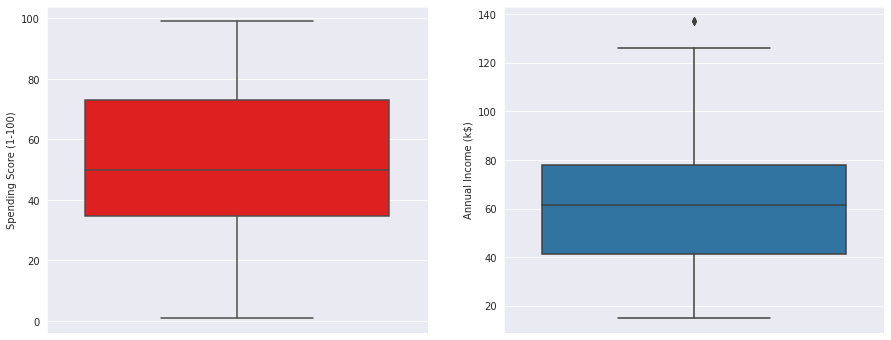

In [123]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

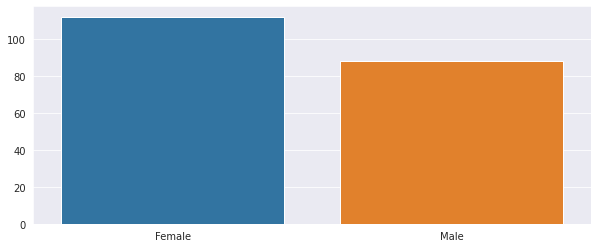

In [124]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

ObservationS: The female customers clearly outweighs the male counterpart

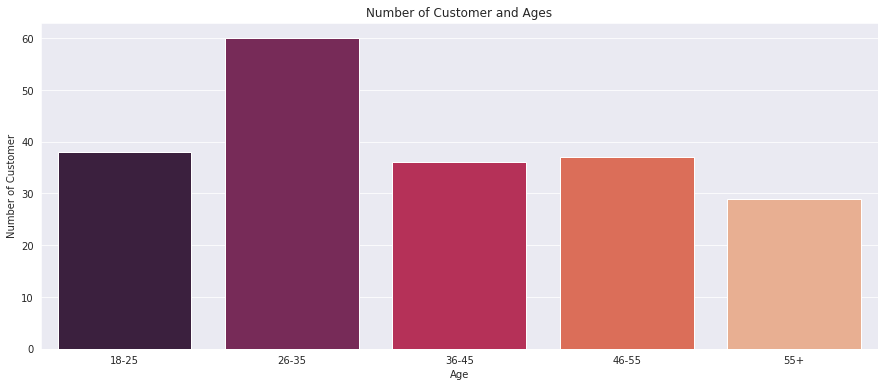

In [125]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


Observation: Clearly the 26–35 age group outweighs every other age group

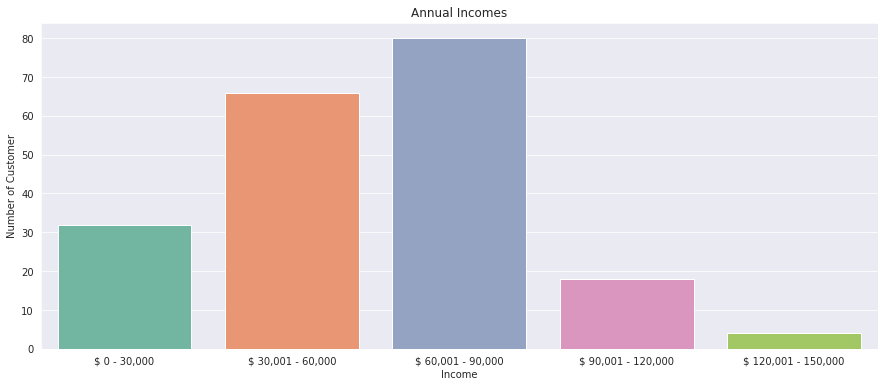

In [126]:
#Explore data with annual income
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


Observation:The largest group of customers have annual income  $60. to $90.K

In [127]:
#check for correlation
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


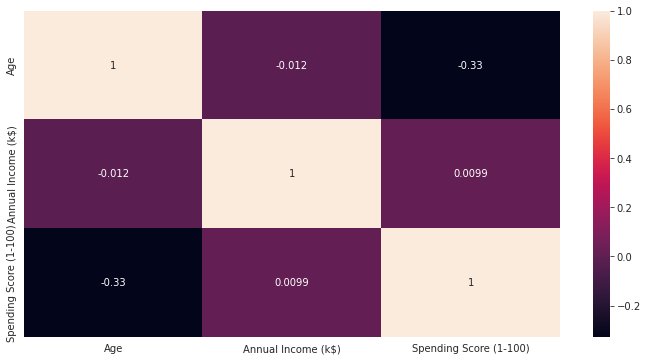

In [128]:
#checking for correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()


Obervation:

We can see that there is an inverse correlation between Age and Spending_Score


Clustering based on 2 features


In [129]:
#use just the Annual Income and Spending score
df1=df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

**Build the clustering model**

The Elbow Method

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The steps can be summarized in the below steps:

Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.

For each K, calculate the total within-cluster sum of square (WCSS).

Plot the curve of WCSS vs the number of clusters K.

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

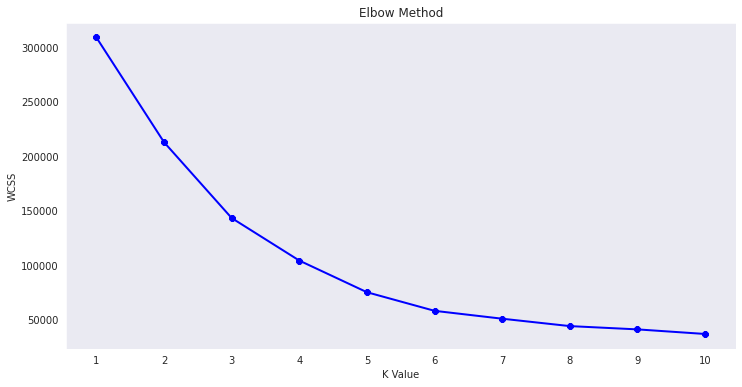

In [130]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="b", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('Elbow Method')
plt.show()

Observation : The optimal K value is found to be 5 using the elbow method.

In [131]:
#use just the Annual Income and Spending score
df1=df[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [132]:
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


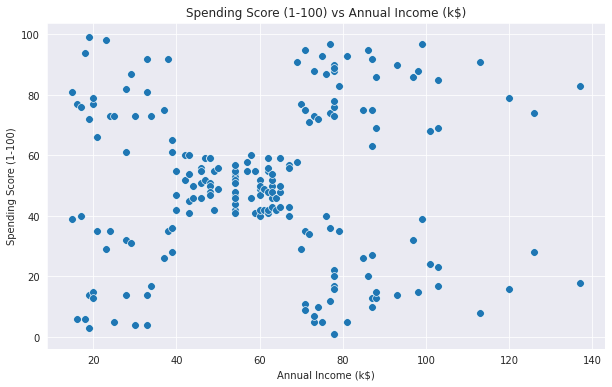

In [133]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Observation : The chart clearly shows 5 clusters 

**Build the clustering model**

The Elbow Method

We need to  calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.

In [134]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [135]:
wcss=[]
for i in range(1,11):
    kMeans=KMeans(n_clusters=i)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)

In [136]:
#build a model with 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


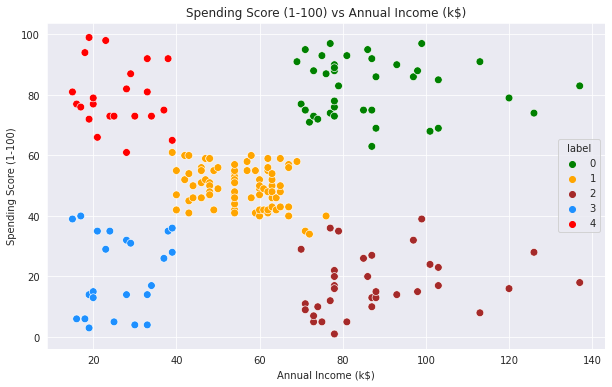

In [137]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Observation :

We clearly see  5 different clusters from the data. The red cluster is the customers with the least income and least spending score and the blue cluster is the customers with the most income and most spending score.


Lets us use the Silhouette Score to look at the  clustering metric

The Silhouette Score is used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.

 The higher the silhouette score, the better the model.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.


Lets calculate the silhouette score of the model we just built to see which cluster has the best score 

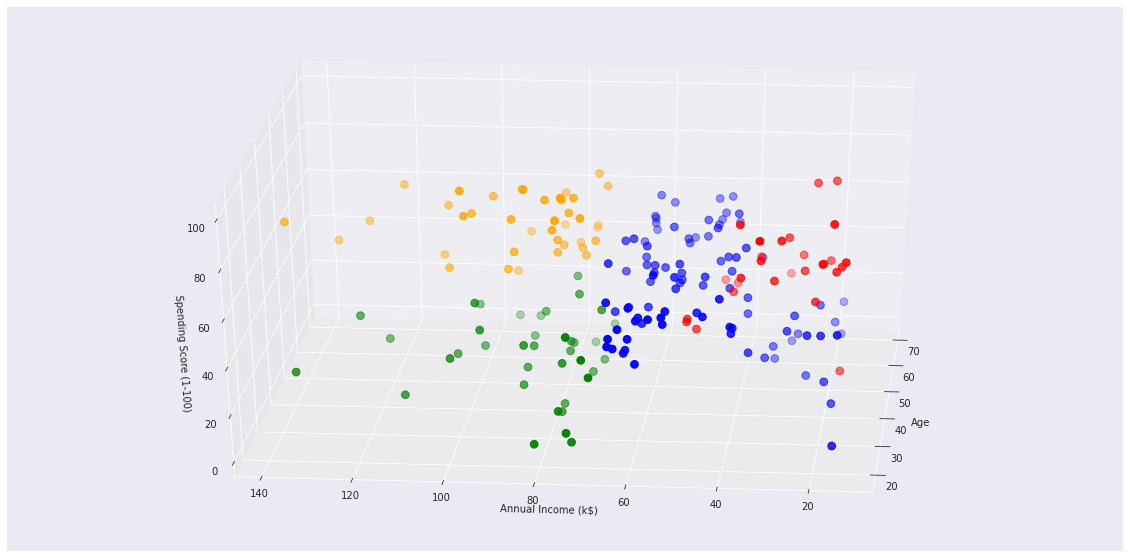

In [138]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [139]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


Observation : The silhouette scorefor model with 4 clusters is about 0.35

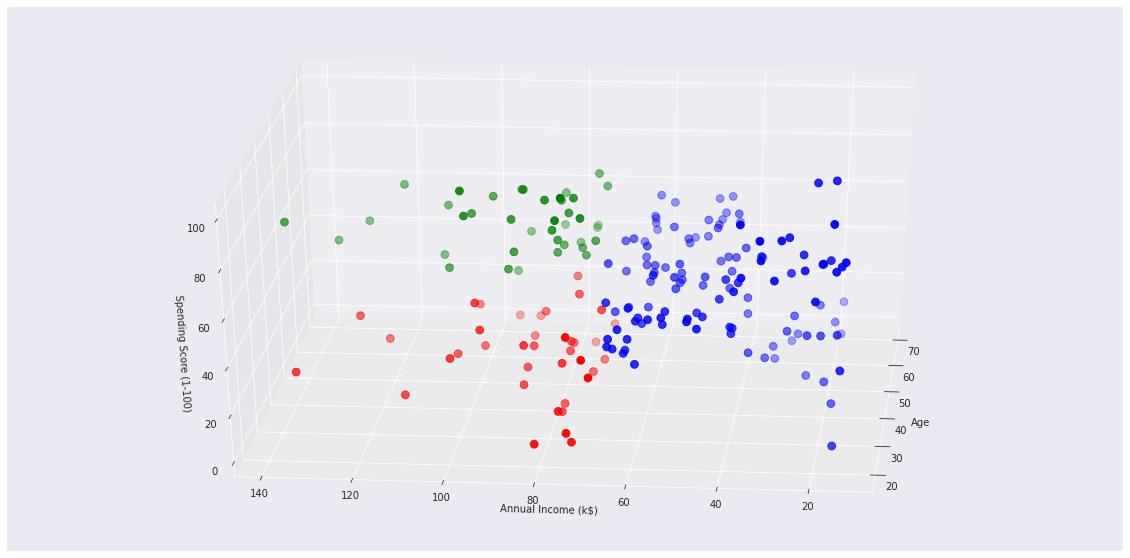

In [140]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [141]:
# First, build a model with 3 clusters

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.31214668104230414



Observation : The silhouette score for model with 3 clusters  is about 0.31


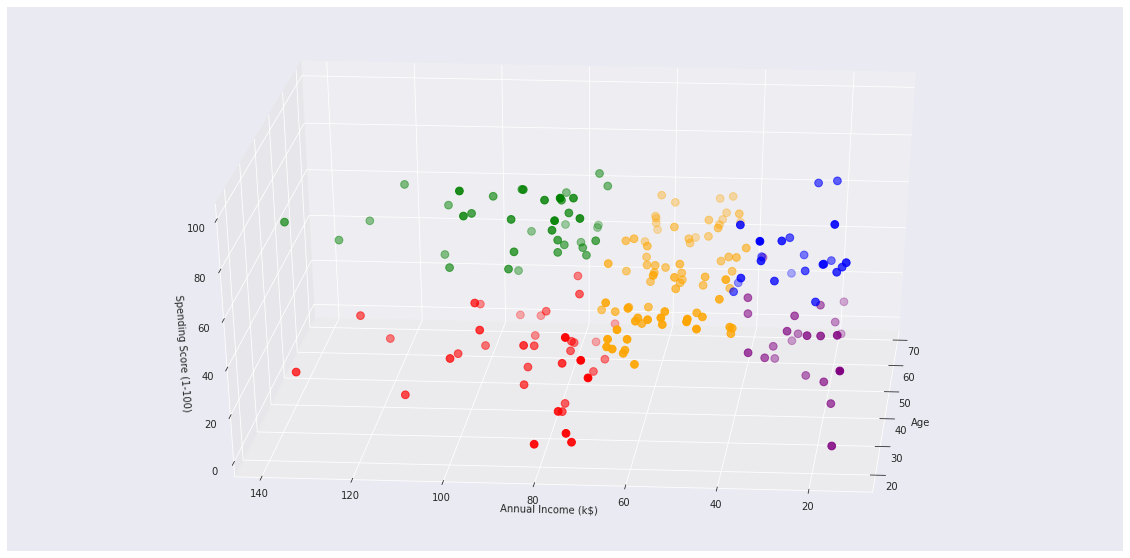

In [142]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [143]:
# First, build a model with 5 clusters

kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.34977050035201074



Observation : The silhouette scorefor model with 5 clusters  is about 0.34

**Conclusion**

There are 5 main group of customers .The marketing team could run different campaigns on each customer group.


In order to decide what group or cluster to target for promo or to startegize for ,the analysis surgest that # 5 clusters, meaning 5 customer groups. But who are people in these groups?

Group 1: Poor and not-spender - customers with low income and low spending score (cluster #4)
Group 2: Poor and spender - customers with low income, but spending a lot (cluster #2)
Group 3: Neutral - customers with mid income and mid spending score (cluster #0)
Group 4: Rich and not-spender - customers with high income and low spending score (cluster #1)
Group 5: Rich and spender - customers with high income and high spending score (cluster #3)


The goal of the project was to segment the customers/market to enable the owners of the mall maximize profit and at the same time meet the needs of the customers by knowing thier needs.I will say  K means is a great tool for this and would help acheive this goal.

Finally, based on our machine learning technique used , i recomend marketing should  should target people in to clusters 3 ,4 and cluster 5 .They should also adopt some other marketing strategy for those in  cluster 1 and  2 in order to keep them happy and satisfied
